# Regression

## Regression: definition

Consider random vector $(\xi, \eta)$ and its realization $(y, x)$. The conditional probability for $y$ is then
$$
p_{\xi}(y|x) = \frac{p_{\xi\eta}(y, x)}{p_{\eta}(x)}
$$

If $y$ and $x$ are independent, we don't get any new information. If they are dependent, we get that $\xi$ is dependent on $x$ via **regression function**:
$$
\mathbb{E}[\xi|\eta=x] = \int y p_{\xi}(y|\eta=x) \rm{d} y = r(x)
$$

The dependency of $\xi$ on $\eta$ is called **regression** of $\xi$ on $\eta$.

## Regression: example

Let
$$
(\xi, \eta) \sim \mathcal{N}\left(
\begin{bmatrix}
m_1 \\ m_2
\end{bmatrix},
\begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_2 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{bmatrix}
\right)
$$

Then
$$
r(x) = m_1 + \rho (x - m_2) \frac{\sigma_1}{\sigma_2} = \theta_1 + \theta_2 x
$$

It is a **linear function**.

## Linear regression: definition

Let $x$ be $k$-dimensional and $y$ be unidimensional. Then, consider the following **model**, called **Linear Parametric Assumption**:
$$
y_j = \theta^\top x_j + \varepsilon_j,
$$
where $\theta = (\theta_1, \ldots, \theta_k)$ and
$$
\begin{aligned}
\mathbb{E}[\varepsilon_j] & = 0 & , \forall j, \\
\mathbb{V}\rm{ar}(\varepsilon_j) & = \sigma^2 & , \forall j, \\
\rm{cov}(\varepsilon_i, \varepsilon_j) & = 0 & , i \neq j.
\end{aligned}
$$

These assumptions are strong and may be violated. If $\rm{cov}(\varepsilon_i, \varepsilon_j) \neq 0, i \neq j$, we say that we are dealing with **misspecified noise**. The estimate that we will derive will still be unbiased but not optimal.

Denote $Y = (y_1, \ldots, y_n), X = (x_1, \ldots, x_n), \varepsilon = (\varepsilon_1, \ldots, \varepsilon_n)$. Then,
$$
Y = X \theta + \varepsilon
$$

## Linear regression: derivation

$$
Y = X \theta + \varepsilon
$$

We will look for an unbiased estimate of $\theta$ of lowest variance in the following form:
$$
\begin{aligned}
\hat{\theta} & = B Y, \\
\mathbb{E}[\hat{\theta}] & = \theta, \\
B X & = E
\end{aligned}
$$

The task is to find:
$$
\begin{cases}
\mathbb{V}\rm{ar}(\hat{\theta}) \to \min \\
\text{s.t. } B X = E
\end{cases}
$$

The variance is:
$$
\begin{aligned}
\mathbb{V}\rm{ar}(\hat{\theta}_i) & = \mathbb{E}\left[ \left( b_i^\top Y - b_i^\top X \theta \right)^2 \right] = \mathbb{E}\left[ \left( b_i^\top Y - b_i^\top X \theta \right) \left( b_i^\top Y - b_i^\top X \theta \right)^\top \right] = \\
& = \mathbb{E}\left[ b_i^\top \left( Y - X \theta \right) \left( Y - X \theta \right)^\top b_i \right] = \mathbb{E}\left[ b_i^\top \varepsilon \varepsilon^\top b_i \right] = b_i^\top \mathbb{E}\left[\varepsilon \varepsilon^\top \right] b_i = \\
& = b_i^\top \sigma^2 E b_i = \sigma^2 b_i^\top b_i
\end{aligned}
$$

## Linear regression: derivation

The task is to find:
$$
\begin{cases}
\mathbb{V}\rm{ar}(\hat{\theta}) \to \min \\
\text{s.t. } B X = E
\end{cases}
$$

The variance is $\mathbb{V}\rm{ar}(\hat{\theta}_i) = \sigma^2 b_i^\top b_i$. Using Lagrangian method with Lagrangian multipliers $\Lambda_i = (\lambda_{i1}, \ldots, \lambda_{ik})$, we need to solve:
$$
\mathcal{L} = b_i^\top b_i + \Lambda_i (X^\top b_i - e_i) \to \min_{b_i}
$$
$$
\frac{\partial \mathcal{L}}{\partial b_i} = 2 b_i + X \Lambda_i = 0
$$

Therefore,
$$
\begin{cases}
B = - \frac12 \Lambda X^\top, \\
\Lambda = -2 \left( X^\top X \right)^{-1}
\end{cases}
$$

Finally,
$$
\hat{\theta} = B Y = \left( X^\top X \right)^{-1} X^\top Y
$$

## Linear regression: RSS

LSE is unbiased and optimal in class of linear estimates.
$$
\begin{aligned}
S & = \varepsilon^\top \varepsilon = (Y - X \theta)^\top (Y - X \theta) = (Y - \hat{Y} + \hat{Y} - X \theta)^\top (Y - \hat{Y} + \hat{Y} - X \theta) = \\
& = (Y - \hat{Y})^\top (Y - \hat{Y}) + 2 \underbrace{(Y - \hat{Y})^\top (Y - X \theta)}_{0} + (\hat{Y} - X \theta)^\top (\hat{Y} - X \theta) = \\
& = S_1 + S_2
\end{aligned}
$$

- $S_1$ is the residual sum of squares
- $S_2$ is the sum of squared associated with uncertainty in estimated parameters
$$
\mathbb{E}[S] = \mathbb{E}[\varepsilon^\top \varepsilon] = \mathbb{E}[\rm{tr} \left( \varepsilon^\top \varepsilon \right) ] = \rm{tr} \left( \mathbb{E}[\varepsilon^\top \varepsilon ]\right) = n \sigma^2
$$
$$
\mathbb{E}[S_2] = k \sigma^2
$$

Therefore,
$$
\mathbb{E}[S_1] = (n-k) \sigma^2
$$

Finally,
$$
\hat{\sigma}^2 = \frac{\mathbb{E}[(Y - \hat{Y})^\top (Y - \hat{Y})]}{n-k}
$$

## Linear regression: RSS

If $\varepsilon \sim \mathcal{N}(0, \sigma^2 E)$, then
- $Y \sim \mathcal{N}(X\theta, \sigma^2E)$
- $\hat{\theta} \sim \mathcal{N}(\theta, \sigma^2 (X^\top X)^{-1})$

Then,
$$
\frac{S}{\sigma^2} \sim \chi^2(n)
$$

And, given that $S_1$ and $S_2$ are independent, we have:
$$
\frac{S_1}{\sigma^2} \sim \chi^2(n-k)
$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = load_boston()
data = pd.DataFrame(
    np.concatenate([
        data["data"], np.expand_dims(data["target"], -1)
    ], axis=1),
    columns=data["feature_names"].tolist() + ["MEDV"]
)
data_train, data_test = train_test_split(data, test_size=0.2)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    data_train.drop("MEDV", axis=1),
    data_train["MEDV"]
);
prediction = lr.predict(data_test.drop("MEDV", axis=1))
mean_squared_error(
    data_test["MEDV"],
    prediction
)

18.302407500322

In [4]:
r2_score(
    data_test["MEDV"],
    prediction
)

0.7564088458745873

In [5]:
import statsmodels.api as sm

In [6]:
mod = sm.formula.ols(
    formula="MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT",
    data=data
)
res = mod.fit()

In [7]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 28 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        19:30:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model selection

## Model selection

- model $m$, real model $m^\ast$
- loss function $\ell(f, X) = \| Y - f(X) \|^2$
- risk function $R(f) = \mathbb{E}_X[\ell(\cdot)]$
- empirical risk (data fit) $\hat{R}_m$
- actual risk $R(m, m^\ast)$

If we minimize empirical risk w.r.t. $m$ we obtain $\hat{m} = p$, so it is a bad idea for model selection. Let's look closer at the empirical risk:
$$
\hat{R}_m = \mathbb{E}_X[\| Y - f_m(X) \|^2] = \| Y^\ast - f_{m}(X) \|^2 + \sigma^2 (n-m)
$$

One can easily make a correction of the empirical risk which delivers an unbiased risk estimate:
$$
\tilde{R}_m = \| Y - f_m(X) \|^2 + 2 \sigma^2 m
$$
$$
\mathbb{E}[\tilde{R}_m] = R(m, m^\ast) + \sigma^2 n
$$

We can define
$$
\hat{m} = \arg\min_m \tilde{R}_m = \arg\min_m \left( \| Y - f_m(X) \|^2 + 2 \sigma^2 m \right)
$$

## Model selection

- Cross-validation (LOO, $k$-fold)
- Structured risk minimization (VC-dimension)
- Minimum description length (penalized likelihood, e.g. Ridge regression, Lasso regression)
- Information criteria (Bayesian information criterion, Akaike information criterion)
- Maximum evidence (comparing priors)

$$
\hat{m} = \arg\max_m p_m(y|x) = \arg\max_m \int p(y|x, \theta) p_m(\theta) \rm{d} \theta
$$

# Ridge regression

## Ridge regression

Consider:
$$
p(t, \theta | x) = p(t | x, \theta) p(\theta) = \mathcal{N}(t; \theta^\top x, \beta^{-1}) \mathcal{N}(\theta; 0, \alpha^{-1} E)
$$

Then,
$$
\begin{aligned}
\theta^{MP} & = \arg\max_\theta p(\theta|X, Y) = \arg\max_\theta p(Y | X, \theta) p(\theta) = \\
& = \arg\max_\theta \prod_{i=1}^n \sqrt{\frac{\beta}{2 \pi}} \exp \left( -\frac{\beta}{2} (y_i - \theta^\top x_i)^2 \right) \left( \frac{\alpha}{2 \pi} \right)^{\tfrac{d}{2}} \exp \left( -\frac{\alpha}{2} \theta^\top \theta \right)  = \\
& = \arg\min_\theta \left( \theta^\top \left( \beta X^\top X + \alpha E \right) \theta - 2 \theta^\top X^\top X \right) = \\
& = \left( X^\top X + \frac\alpha\beta E \right)^{-1} X^\top Y
\end{aligned}
$$

How to select $\gamma = \frac\alpha\beta$? What if $p(\theta) = \mathcal{N}(\theta; 0, A)$?

# Logistic regression

## Logistic regression

So far we have assumed that $Y$ is real-valued. Logistic regression is a parametric method for regression when $Y$, e.g. $Y\sim Be(p)$. For a $k$-dimensional covariate $X$, the model is:
$$
p_i = p(Y_i = 1) = \left( 1 + \exp \left( - \theta^\top X_i \right) \right)^{-1} = \sigma(\theta^\top X_i)
$$

Equivalently,
$$
\log p_i = {\rm logit}(\theta^\top X_i)
$$
where
$$
{\rm logit}(p) = \log \left( \frac{p}{1-p} \right)
$$

## Logistic regression

There is no closed-form solution for $\hat{\theta}$. It has to be found using iterative methods, e.g. **Reweighted Least Squares**:
0. Set all $p_i^0$ using random parameters $\theta$
1. Set
$$
Z_i = {\rm logit}(p_i^s) + \frac{Y_i - p_i^s}{p_i^s (1 - p_i^s)}
$$
2. Let $W$ be a diagonal matrix with $w_{ii} = p_i^s (1 − p_i^s )$.
3. Set
$$
\theta^s = (X^\top W X)^{-1} X^\top W Y
$$

In [10]:
data = load_iris(as_frame=True)
data = pd.concat([
    data["data"],
    data["target"]
    ],
    axis=1
)

In [12]:
data = data[data["target"].isin([0, 1])]

In [16]:
data.columns = ["sep_len", "sep_wid", "pet_len", "pet_wid", "target"]

In [20]:
import seaborn as sns

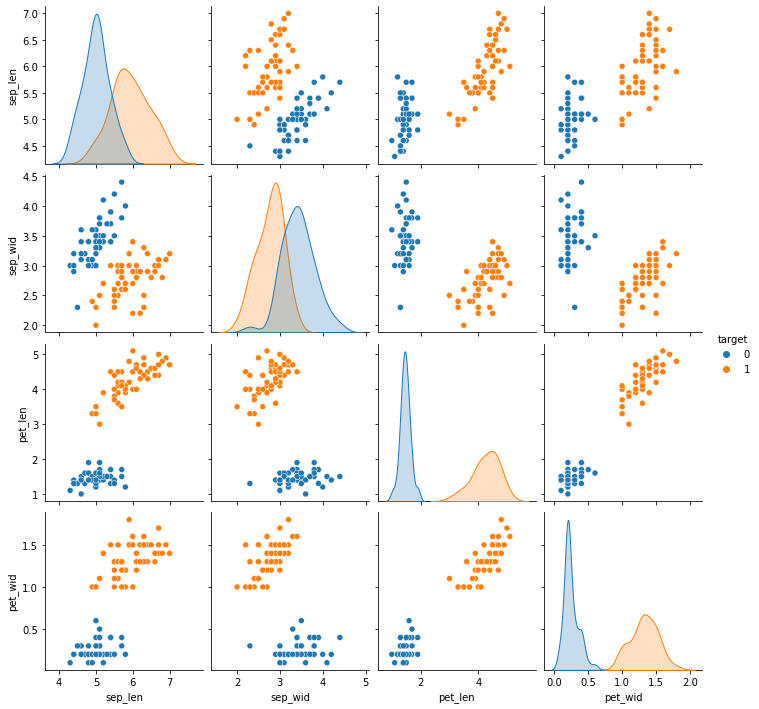

In [22]:
sns.pairplot(data, hue="target")

In [33]:
model = sm.formula.rlm(
    formula="target ~ sep_len + sep_wid + pet_len + pet_wid",
    data=data
)
res = model.fit()

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                 target   No. Observations:                  100
Model:                            RLM   Df Residuals:                       95
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 28 Apr 2021                                         
Time:                        20:02:48                                         
No. Iterations:                    30                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2903      0.121      2.393      0.017       0.052       0.528
sep_len       -0.0256      0.033     -0.785      0.432      -0.089       0.038
sep_wid       -0.1550      0.032     -4.833      0.000      -0.218      -0.092
pet_len        0.2183      0.040      5.513      0.000       0.141       0.296
pet_wid        0.2581      0.085      3.035      0.002       0.091       0.425
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

# Generalized linear model

## Generalized linear model

For **any** distribution in exponential family:
$$
y = g^{-1} \left( \sum_{i=1}^n w_i g(x_i) \right)
$$
where $g(\cdot)$ is **link function** ($g^{-1}$ is often callen **mean function**).

What is link function for:
- Linear regression: $y = x^\top \theta$

$$
g(p) = p
$$

- Logistic regression: $y = \frac{1}{1 + \exp \left( - x^\top \theta \right)}$

$$
g(p) = \log \left( \frac{p}{1-p} \right)
$$